## 1. Import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from matplotlib.colors import BASE_COLORS
%matplotlib inline

## 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [3]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

## 3. First look at its main features (head, shape, info).

In [4]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.shape

(9134, 24)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## 4. Rename the columns so they follow the PE8 (snake case)

https://www.python.org/dev/peps/pep-0008/ \ PE8 -- Style Guide for Python Code

In [7]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

## 5. Change effective to date column to datetime format.

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

## 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [9]:
customer_df['income'] = customer_df['income'].astype(float)
type(customer_df['income'][0])

numpy.float64

In [10]:
def filtering(x):
    discrete_df = customer_df.select_dtypes('int64')
    continuous_df = customer_df.select_dtypes('float64')
    return discrete_df, continuous_df

discrete_df, continuous_df = filtering(customer_df)

In [11]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   monthly_premium_auto           9134 non-null   int64
 1   months_since_last_claim        9134 non-null   int64
 2   months_since_policy_inception  9134 non-null   int64
 3   number_of_open_complaints      9134 non-null   int64
 4   number_of_policies             9134 non-null   int64
dtypes: int64(5)
memory usage: 356.9 KB


In [12]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   income                   9134 non-null   float64
 2   total_claim_amount       9134 non-null   float64
dtypes: float64(3)
memory usage: 214.2 KB


## 7. Plot a correlation matrix, comment what you see.

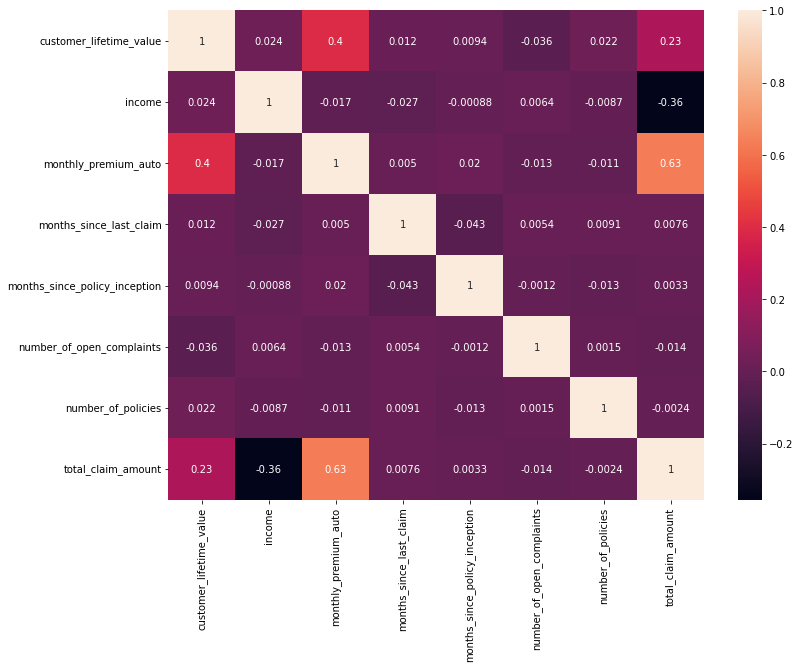

In [13]:
plt.figure(figsize=(12, 9))
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## 8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

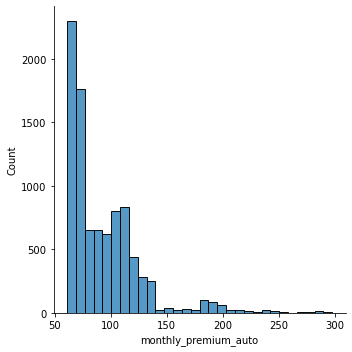

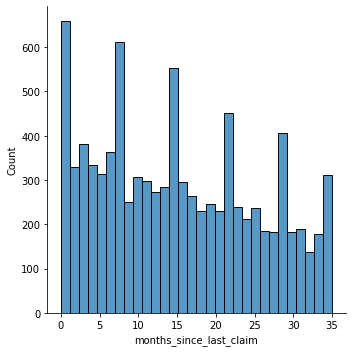

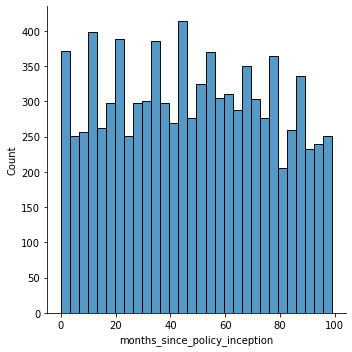

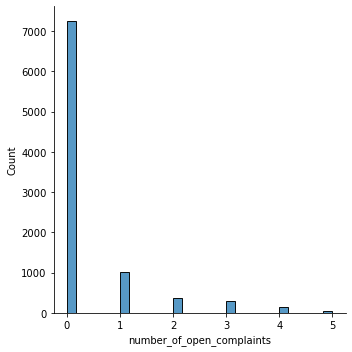

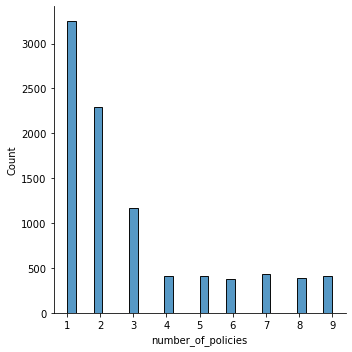

In [14]:
for i in discrete_df.columns:
    sns.displot(x = i, data = discrete_df, bins=30)
    plt.show()

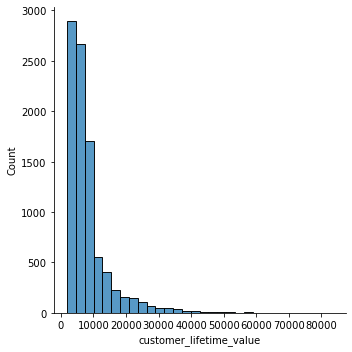

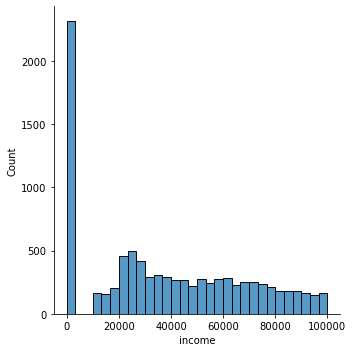

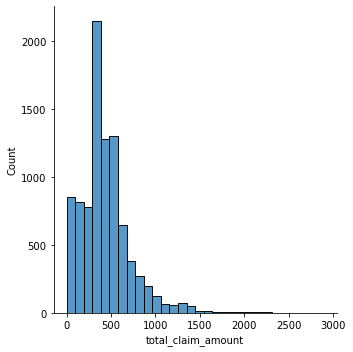

In [15]:
for i in continuous_df.columns:
    sns.displot(x = i, data = continuous_df, bins=30)
    plt.show()

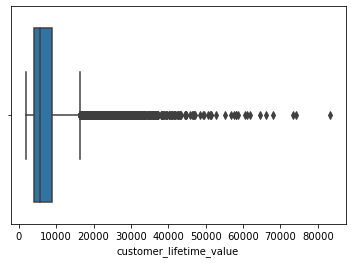

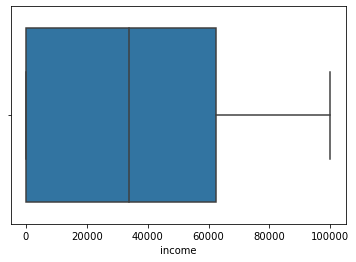

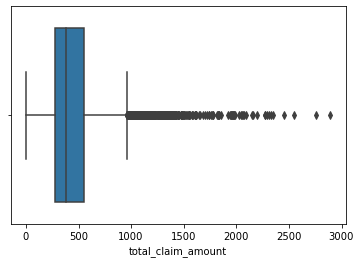

In [16]:
for i in continuous_df.columns:
    sns.boxplot(x = i, data = continuous_df)
    plt.show()

## 9. Comment what you can see in the plots.

'''Continous. Customer_liftime_value and Totalclaim_amount seems to be very similar distributed. We find pretty much 'outliers' for this two variables. Not outliers in the income value.
'''

## 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [17]:
# already done above. 

## 11 . Did you find outliers? Comment what you will do with them.

'''there seems to be some outliers values in the »Customer_life_column« and »Total_claim_amount«. 
will check them to decide what to do with these values, but initally.
'''

## 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [18]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## The End

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

Open the categoricals variable we created before. categoricals = data.select_dtypes(np.object) categoricals.head()

Plot all the categorical variables with the proper plot. What can you see? There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [19]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [20]:
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [21]:
#Open the categoricals variable we created before. 
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

/var/folders/01/5g33_gtn6zz6mqzd8m_9ngxw0000gn/T/ipykernel_1376/518985902.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# Plot all the categorical variables with the proper plot. What can you see? 

In [27]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

<AxesSubplot:xlabel='vehicle_size', ylabel='count'>

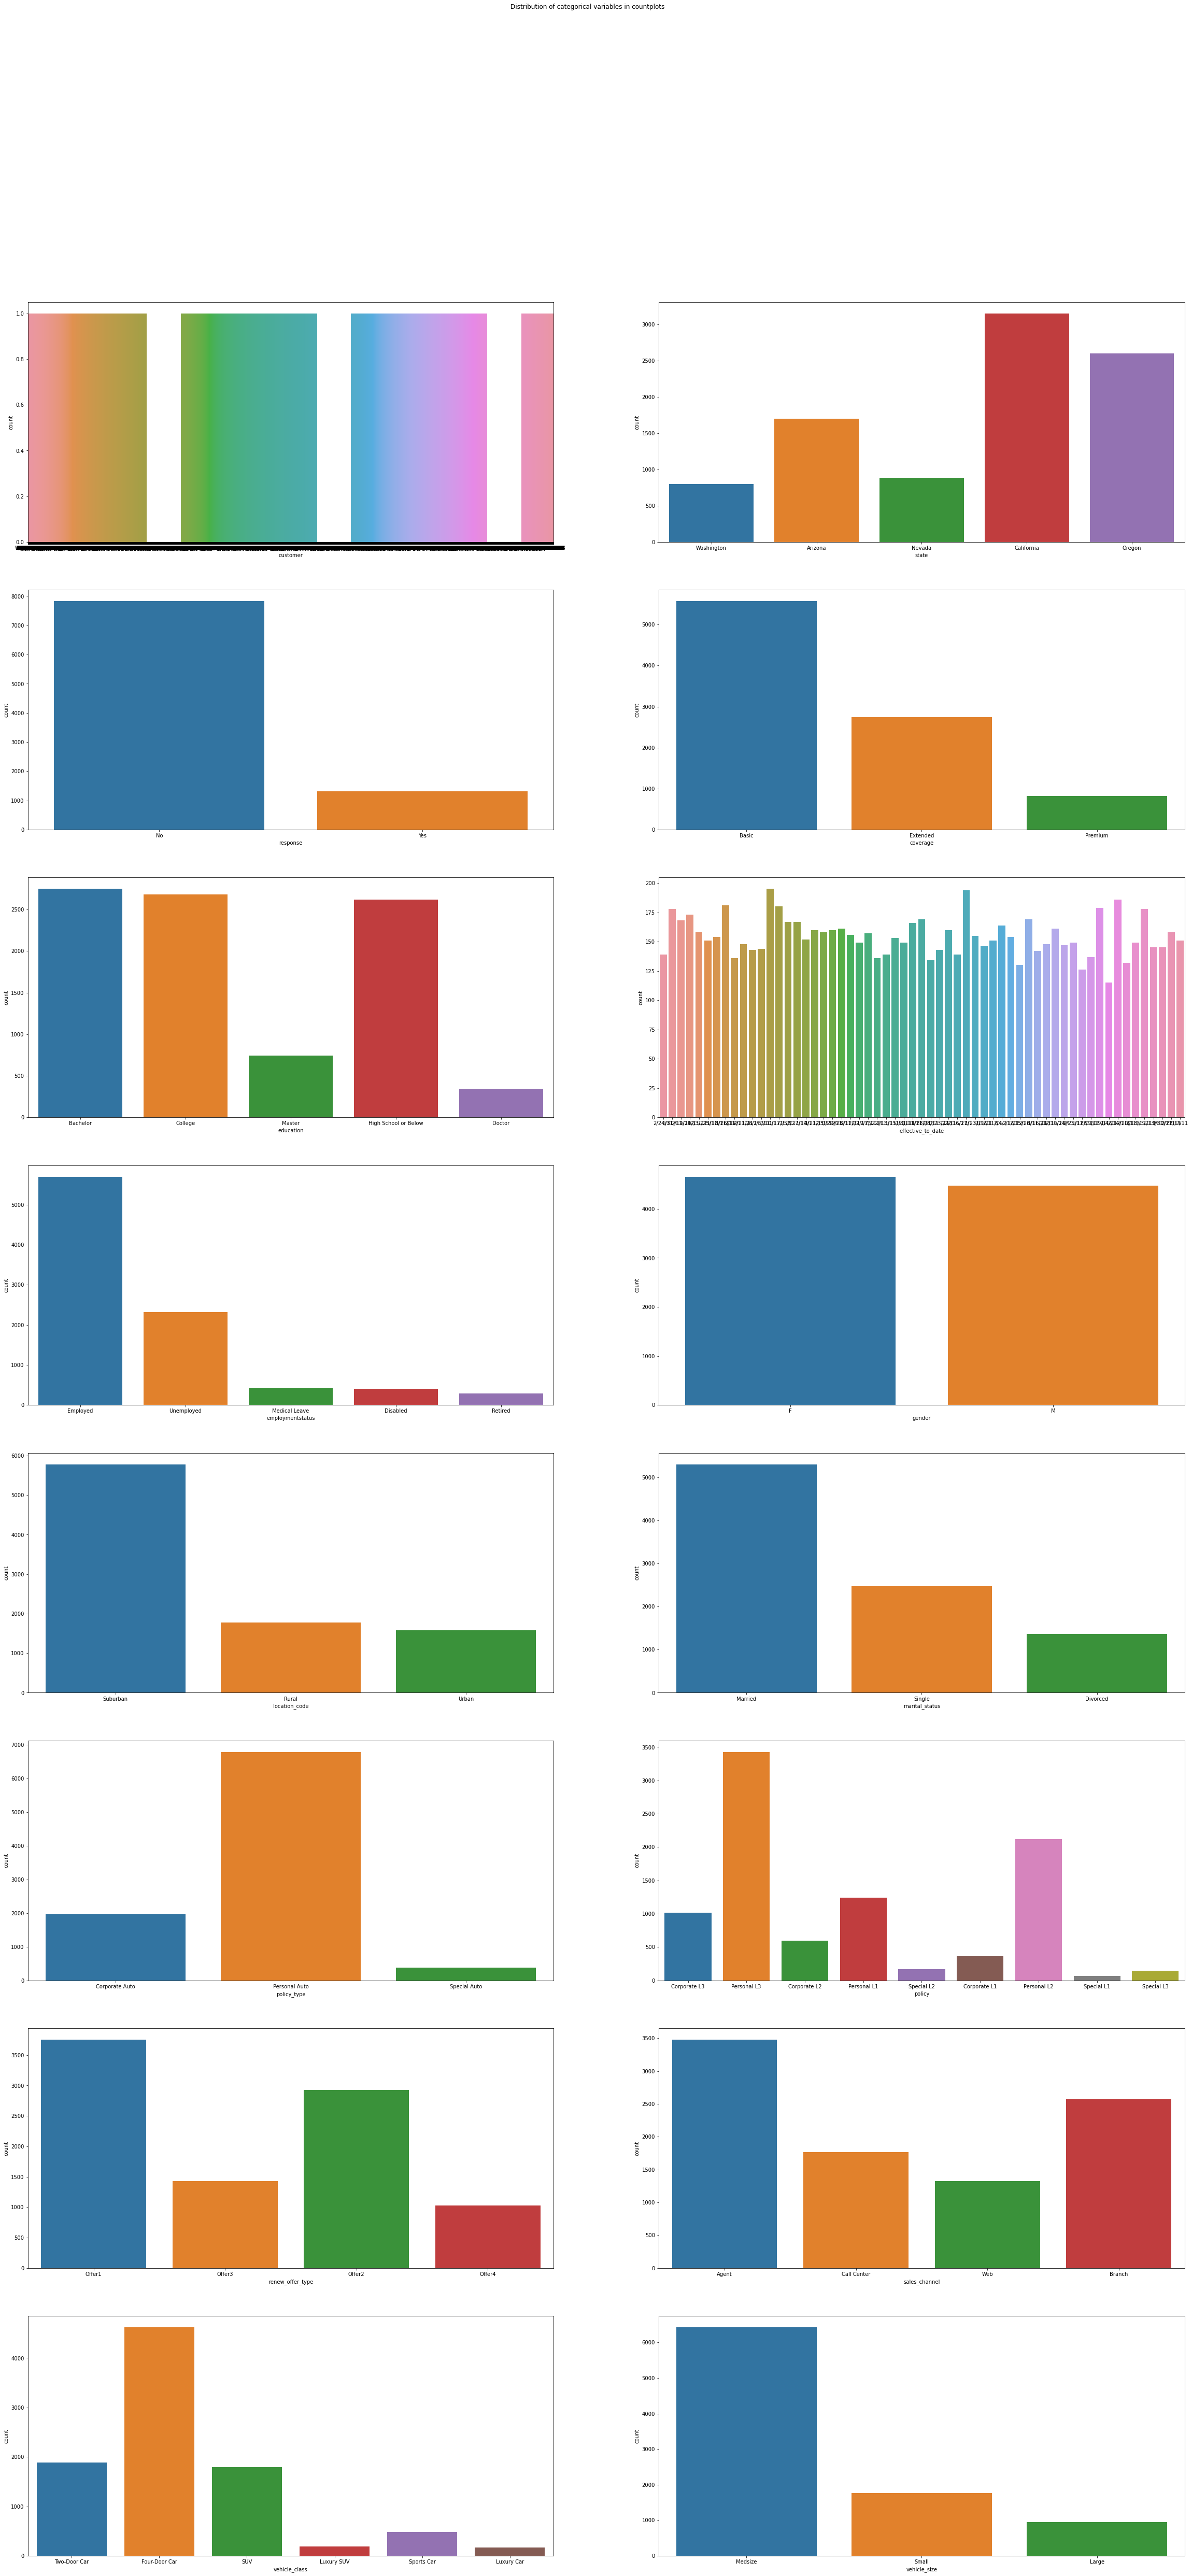

In [28]:
fig, axes = plt.subplots(8,2,  figsize=(40, 80))

fig.suptitle('Distribution of categorical variables in countplots')

sns.countplot(ax=axes[0,0],data= categoricals, x= 'customer')
sns.countplot(ax=axes[0,1],data= categoricals, x= 'state')
sns.countplot(ax=axes[1,0],data= categoricals, x= 'response')
sns.countplot(ax=axes[1,1],data= categoricals, x= 'coverage')
sns.countplot(ax=axes[2,0],data= categoricals, x= 'education')
sns.countplot(ax=axes[2,1],data= categoricals, x= 'effective_to_date')
sns.countplot(ax=axes[3,0],data= categoricals, x= 'employmentstatus')
sns.countplot(ax=axes[3,1],data= categoricals, x= 'gender')
sns.countplot(ax=axes[4,0],data= categoricals, x= 'location_code')
sns.countplot(ax=axes[4,1],data= categoricals, x= 'marital_status')
sns.countplot(ax=axes[5,0],data= categoricals, x= 'policy_type')
sns.countplot(ax=axes[5,1],data= categoricals, x= 'policy')
sns.countplot(ax=axes[6,0],data= categoricals, x= 'renew_offer_type')
sns.countplot(ax=axes[6,1],data= categoricals, x= 'sales_channel')
sns.countplot(ax=axes[7,0],data= categoricals, x= 'vehicle_class')
sns.countplot(ax=axes[7,1],data= categoricals, x= 'vehicle_size')

In [29]:
#There might be some columns that seem to be redundant, check their values to be sure. 
#What should we do with them?
data_crosstab = pd.crosstab(customer_df['coverage'], customer_df['marital_status'], margins = False)
data_crosstab

marital_status,Divorced,Married,Single
coverage,,,
Basic,825,3247,1496
Extended,427,1573,742
Premium,117,478,229


In [30]:
st.chi2_contingency(data_crosstab)

(1.5917156364713243,
 0.810280319861366,
 4,
 array([[ 834.52945041, 3229.61068535, 1503.85986424],
        [ 410.96978323, 1590.44405518,  740.58616159],
        [ 123.50076637,  477.94525947,  222.55397416]]))

<AxesSubplot:xlabel='effective_to_date', ylabel='Count'>

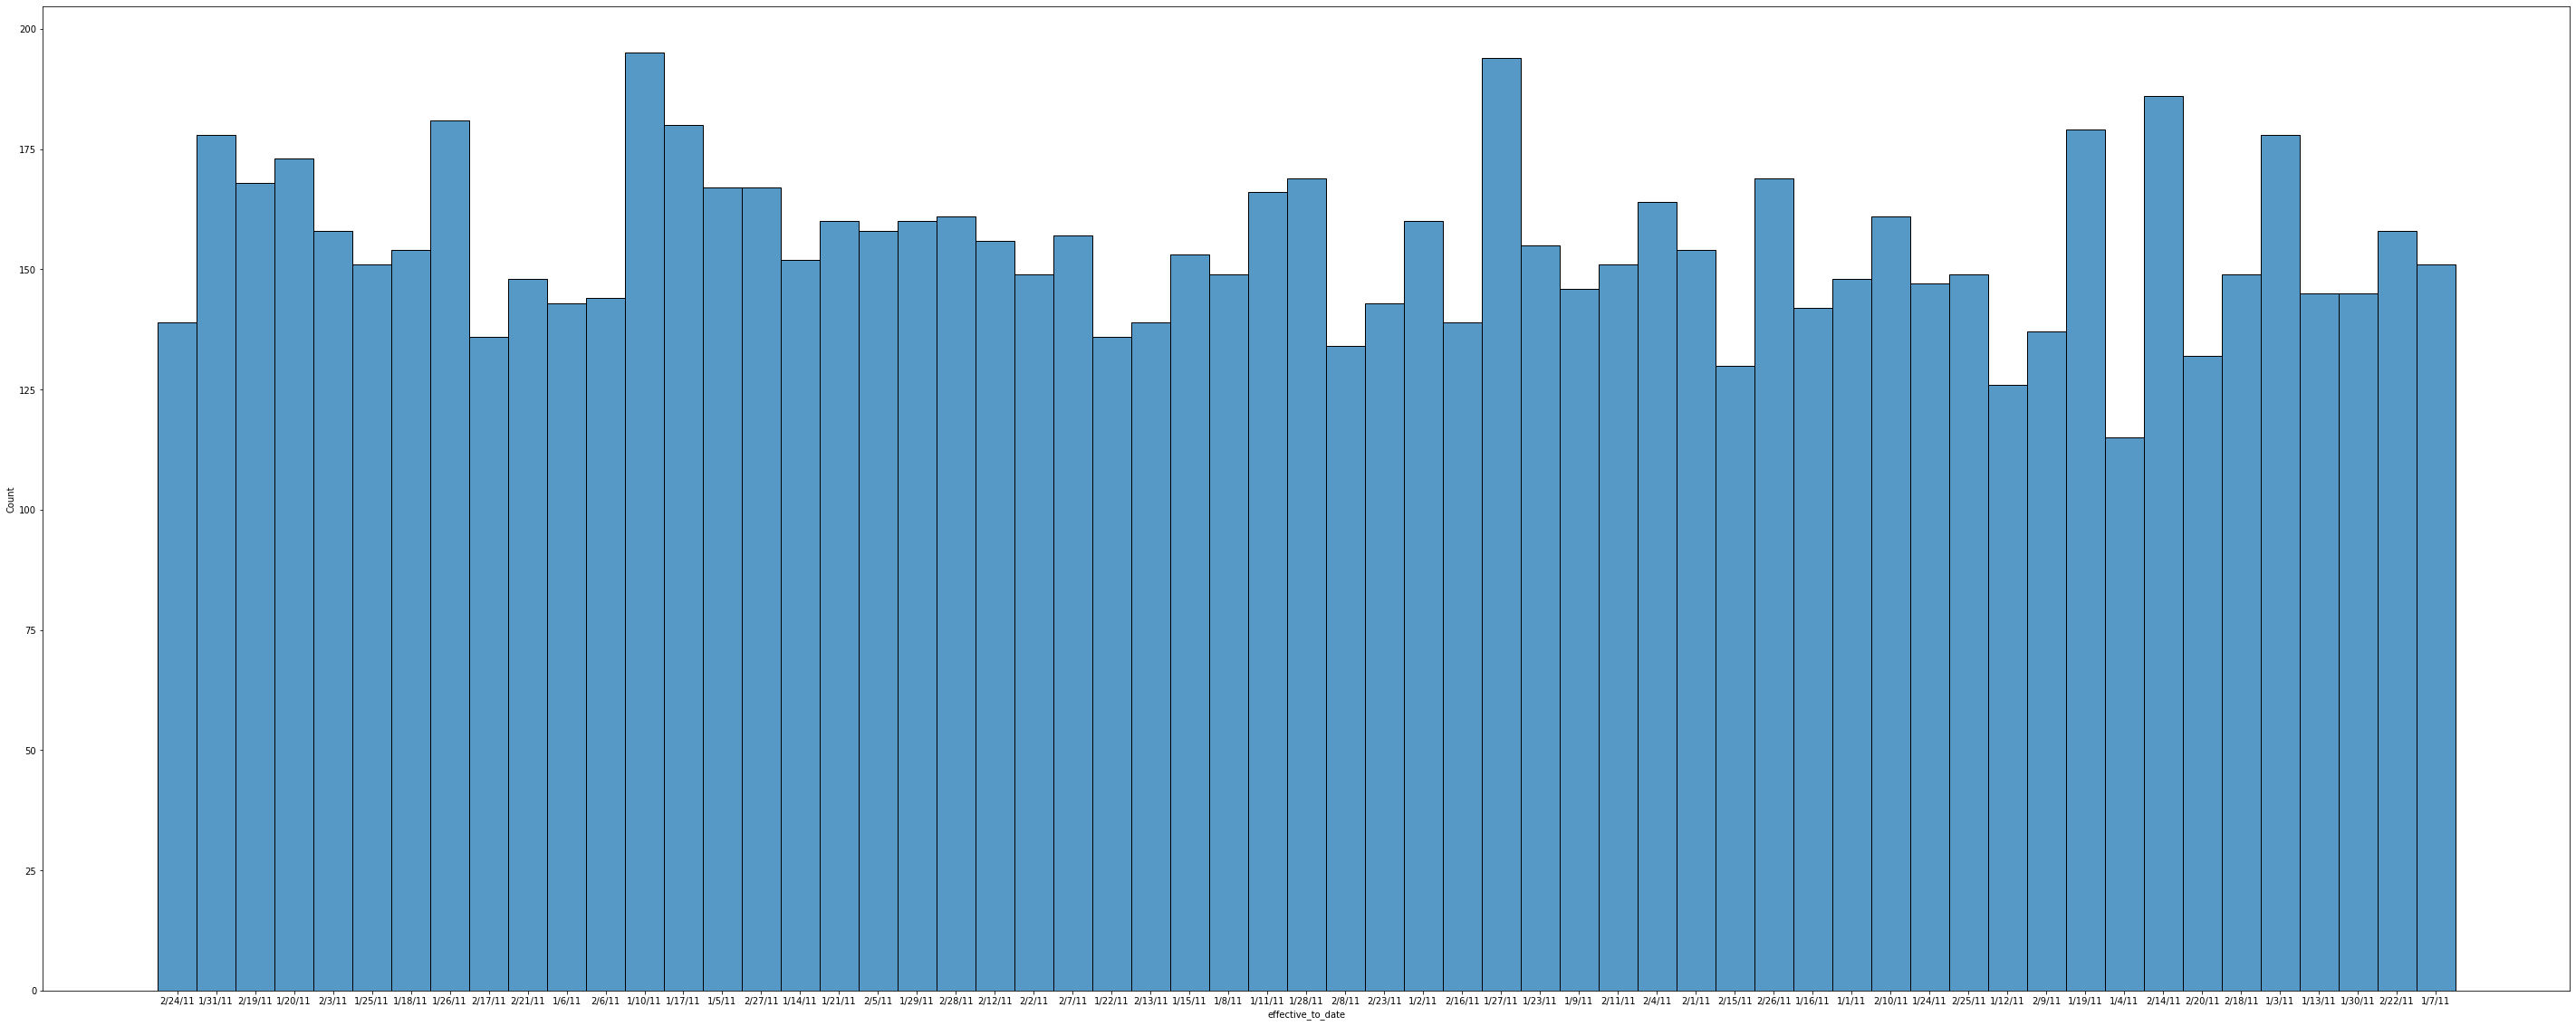

In [31]:
#Plot time variable. Can you extract something from it?
plt.figure(figsize=(50,20))
sns.histplot(data=customer_df, x="effective_to_date")

## Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables (See the hint below for encoding categorical data!!!)

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.



## 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
y = customer_df['total_claim_amount']
X = customer_df.drop('total_claim_amount', axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [68]:
# Function to remove outliers
def rm_outliers(df):
    iqr = np.percentile(df,75) - np.percentile(df,25)
    upper_limit1 = np.percentile(df,75) + 1.5*iqr
    lower_limit1 = np.percentile(df,25) - 1.5*iqr
    df0 = df[(df>lower_limit1) & (df<upper_limit1)].copy()
    sns.displot(df0,kde=True)        
    return plt.show()

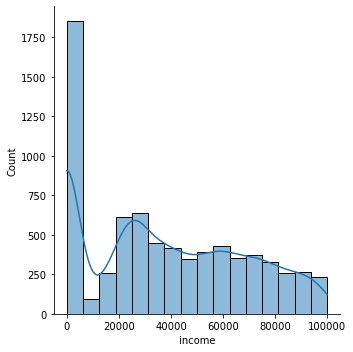

In [63]:
# tmp = rm_outliers(X_train['income'])
# tmp

## 3. Create a copy of the dataframe for the data wrangling.

In [69]:
df = customer_df

In [70]:
customer_df.shape
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 4. Normalize the continuous variables. You can use any one method you want.

In [72]:
from sklearn.preprocessing import MinMaxScaler
MinMaxtransformer =  MinMaxScaler().fit(data)
X_normalized = MinMaxtransformer.transform.(data)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized, columns=data.columns)
return X_normalized

SyntaxError: invalid syntax (1371673106.py, line 3)

In [ ]:
categorical_train = X_train.select_dtypes(include = np.object)
categorical_train.shape

## 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

In [73]:
customer_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

## 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [75]:
customer_df['day'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['year'] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,2011
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2,2011


## 4. Normalize the continuous variables. You can use any one method you want.

In [ ]:
numerical_train = X_train.select_dtypes(include = np.number)
numerical_train.shape
numerical_train.head()

## 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

## 8. Try a simple linear regression with all the data to see whether we are getting good results.

## 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

## 10. Use the function to check LinearRegressor and KNeighborsRegressor.

## 11. You can check also the MLPRegressor for this task!

## 12. Check and discuss the results.

# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

Instructions

Get the numerical variables from our dataset.

Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

## Get the numerical variables from our dataset.

In [46]:
numerical = customer_df._get_numeric_data()
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

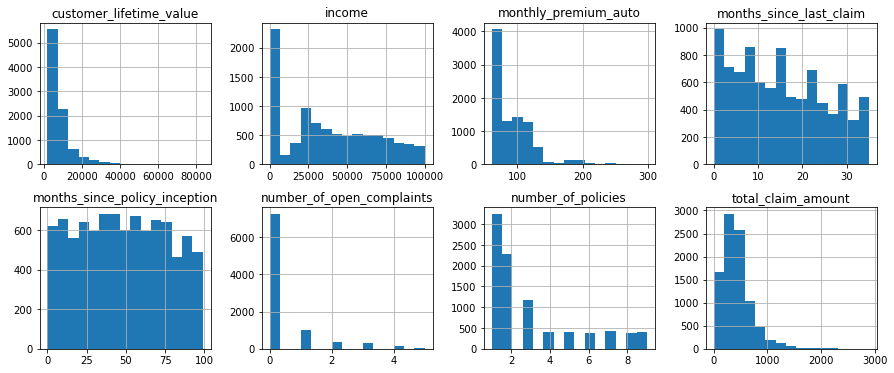

In [47]:
numerical.hist(bins=15, figsize=(15, 6), layout=(2, 4));

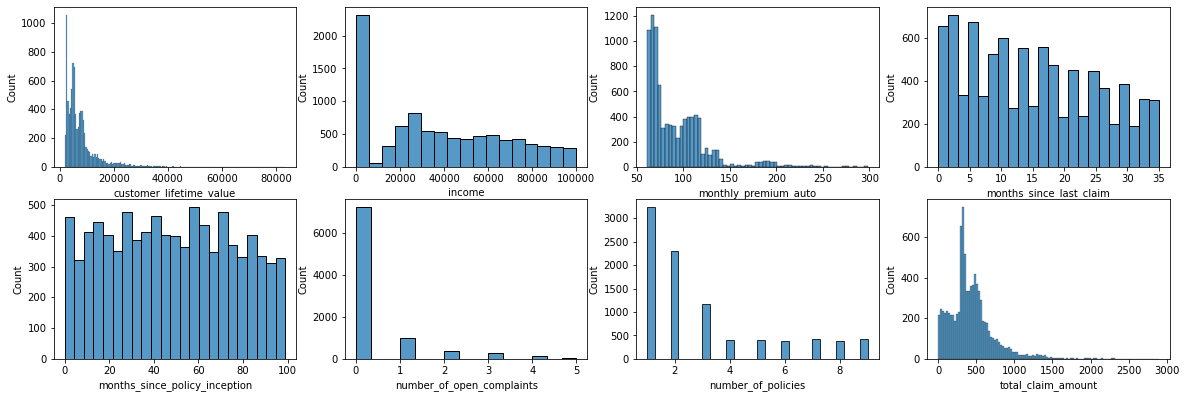

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3,4,i)
    sns.histplot(numerical[column])

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [49]:
#function to rescale with log method 
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN #  we can replace NANs with mean values in the next step   
numerical['customer_lifetime_value_log'] = list(map(log_transfom_clean_, numerical['customer_lifetime_value']))

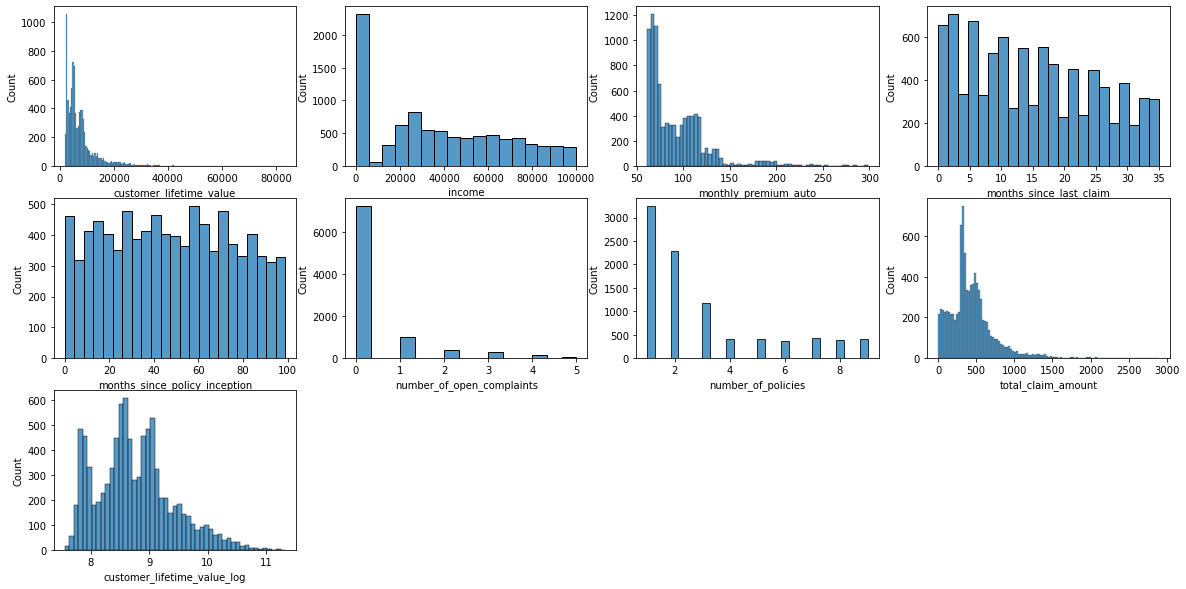

In [50]:
plt.figure(figsize=(20,10))
for i, column in enumerate(numerical.columns, 1):
    plt.subplot(3,4,i)
    sns.histplot(numerical[column])

In [51]:
numerical['customer_lifetime_value_log'] = numerical['customer_lifetime_value_log'].fillna(np.mean(numerical['customer_lifetime_value_log']))

/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


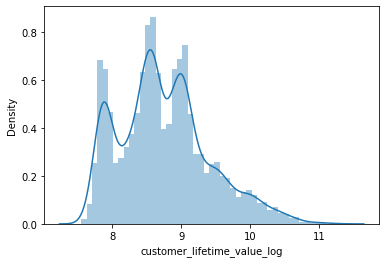

In [52]:
sns.distplot(numerical['customer_lifetime_value_log'])
plt.show();